# Парсинг данных с сайтов с помощью Python

## Что аналитик должен знать об интернете? Браузер. HTML. HTTP. 🌐

Первые прототипы интернета появились ещё в 60-е годы. Но чтобы стать популярным, интернету понадобилось ещё 30 лет. Дело в том, что не было интерфейса: общих правил, как интернетом пользоваться.<br>
В 1991 году в лаборатории ЦЕРН учёный-физик Тим Бернерс-Ли со своей командой размышляли, как сделать работу с интернетом простой. Они пытались придумать правила, по которым можно было бы организовать коммуникацию между компьютерами в сети. Так появился проект всемирной паутины.<br>

Поскольку интернет — сеть компьютеров, которые обмениваются данными, эти данные необходимо как-то оформить. Нужно придумать, как представлять информацию в интернете.<br>

Но мало представить информацию, нужно ещё научить компьютеры её отображать. То есть нужно какое-то программное обеспечение, которое позволит прочитать информацию в интернете и показать её пользователю.<br>

Ну и, наконец, информацией надо как-то обмениваться: нужны правила, по которым компьютеры будут отправлять и получать документы.<br>
В итоге Тим Бернерс-Ли вместе с командой придумали:<br>
*   язык, на котором можно создавать документы в интернете — HTML (от англ. HyperText Markup Language — «язык гипертекстовой разметки») ;
*   программу для просмотра этих документов — браузер;
*   единые правила, по которым документы передаются — транспортный протокол HTTP (от англ. HyperText Transfer Protocol — «протокол передачи гипертекста»).


### пример HTML страницы

In [ ]:
<!DOCTYPE html>
<html>
<head>
<title>Название Страницы</title>
</head>
<body>

<h1>Это Заголовок</h1>
<p>Это Параграф.</p>

</body>
</html>

### **Вот что получается:** <br><br>




<!DOCTYPE html>
<html>
<head>
<title>Название Страницы</title>
</head>
<body>

<h1>Это Заголовок</h1>
<p>Это Параграф.</p>

</body>
</html>

Больше об html [здесь](https://schoolsw3.com/html/html_intro.php)

## Парсим данные [сайта](https://www.cbr.ru/key-indicators/) ЦБ РФ 💰

In [ ]:
import pandas as pd
import requests # Импорт библиотеки для запросов к серверу
from bs4 import BeautifulSoup # Импорт библиотеки для автоматического парсинга странички

URL='https://www.cbr.ru/key-indicators/'
req = requests.get(URL) # GET-запрос
soup = BeautifulSoup(req.text, 'lxml')

In [ ]:
#soup

https://www.crummy.com/software/BeautifulSoup/bs4/doc.ru/

### Как найти нужный элемент?
Нажимаем на него правой клавишей мыши и открываем код элемента
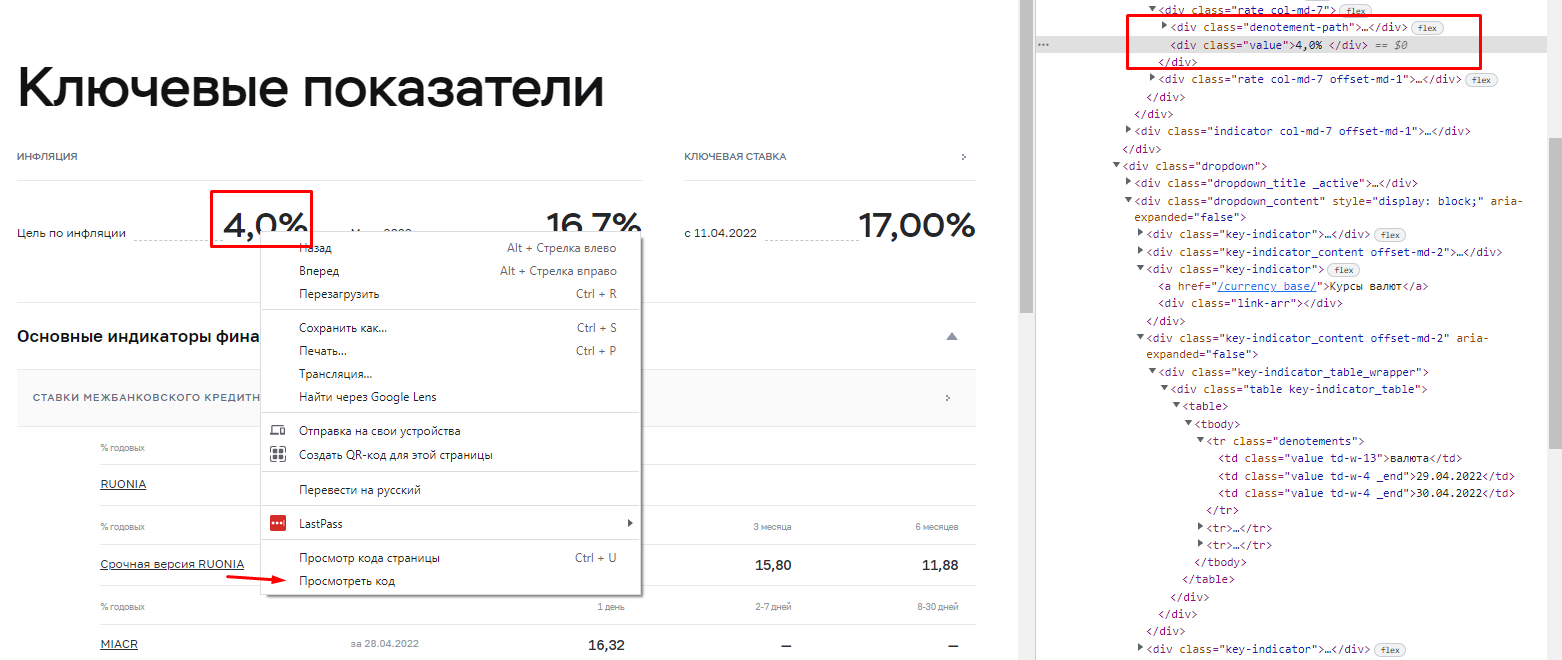

In [ ]:
numbers = []
for tag in soup.find_all('div', attrs = {'class':'value'}):
  numbers.append(tag.text.rstrip()) #убираем лишние символы справа

numbers

['4,0%', '6,0%', '13,00%']

In [ ]:
names = []
for tag in soup.find_all('div', attrs = {'class':'denotement'}):
  names.append(tag.text.lstrip())
names

['Цель по инфляции', 'Сентябрь 2023', 'с\xa018.09.2023']

In [ ]:
df = pd.DataFrame()

In [ ]:
df['name'] = names
df['value'] = numbers

In [ ]:
df

,name,value
0,Цель по инфляции,"4,0%"
1,Сентябрь 2023,"6,0%"
2,с 18.09.2023,"13,00%"


### А теперь курсы валют и металлов

In [ ]:
products = [] # Список, в котором хранятся названия "продуктов"
for row in soup.find_all('div', attrs = {'class':'col-md-5'}):
    products.append(row.text)
products


['RUONIA',
 'Срочная версия RUONIA',
 'MIACR',
 'Китайский юань',
 'Доллар США',
 'Евро',
 'Золото',
 'Серебро',
 'Платина',
 'Палладий']

In [ ]:
products[3:]

['Китайский юань',
 'Доллар США',
 'Евро',
 'Золото',
 'Серебро',
 'Платина',
 'Палладий']

In [ ]:
values = [] # список значений
for row in soup.find_all('td', attrs = {'class':'value td-w-4 _bold _end mono-num'}):
    values.append(row.text)

In [ ]:
values

['13,2893', '97,2865', '102,5200', '5 971,66', '69,06', '2 755,62', '3 568,86']

In [ ]:
names = []
values = []
date = []

for tag in soup.find_all('div', attrs = {'class':'key-indicator'}):
  if tag.text.rstrip() == 'Курсы валют':

    for row in tag.find_all_next('td', attrs = {'class':'value td-w-4 _end'}):#дата
      date.append(row.text)

    for row in tag.find_all_next('td', attrs = {'class':'value td-w-4 _bold _end mono-num'}):#значения
      values.append(row.text)
    for row in tag.find_all_next('div', attrs = {'class':'col-md-5'}):#валюты/металлы
      names.append(row.text)

In [ ]:
date

['17.10.2023', '18.10.2023', '17.10.2023', '18.10.2023']

In [ ]:
names

['Китайский юань',
 'Доллар США',
 'Евро',
 'Золото',
 'Серебро',
 'Платина',
 'Палладий']

In [ ]:
values

['13,2893', '97,2865', '102,5200', '5 971,66', '69,06', '2 755,62', '3 568,86']

In [ ]:
import re
names = []
values1 = []
values2 = []
date = []

for tag in soup.find_all('div', attrs = {'class':'key-indicator'}):
  if tag.text.rstrip() == 'Курсы валют':

    for row in tag.find_all_next('td', attrs = {'class':'value td-w-4 _end'}):#дата
      date.append(row.text)
    for row in tag.find_all_next('td', attrs = {'class':'value td-w-4 _bold _end mono-num'}):#значения 1 столбца
      values1.append(row.text)
    for row in tag.find_all_next('td', re.compile('value td-w-4 _bold _end mono-num.+')):#значения
      values2.append(row.text)
    for row in tag.find_all_next('div', attrs = {'class':'col-md-5'}):#валюты/металлы
      names.append(row.text)

In [ ]:
names

['Китайский юань',
 'Доллар США',
 'Евро',
 'Золото',
 'Серебро',
 'Платина',
 'Палладий']

In [ ]:
values1

['13,2893', '97,2865', '102,5200', '5 971,66', '69,06', '2 755,62', '3 568,86']

In [ ]:
values2

['13,2855', '97,3458', '102,7527', '6 002,99', '70,72', '2 763,56', '3 552,25']

In [ ]:
date

['17.10.2023', '18.10.2023', '17.10.2023', '18.10.2023']

In [ ]:
date[0]

'17.10.2023'

In [ ]:
df = pd.DataFrame()

In [ ]:
import datetime

df['date'] = ''
df['name'] = names
df['value'] = values1
df['update_date'] = datetime.datetime.now()  # заполняем столбец с датами
df['date'] = date[0]

In [ ]:
df

,date,name,value,update_date
0,17.10.2023,Китайский юань,"13,2893",2023-10-17 16:44:27.355287
1,17.10.2023,Доллар США,"97,2865",2023-10-17 16:44:27.355287
2,17.10.2023,Евро,"102,5200",2023-10-17 16:44:27.355287
3,17.10.2023,Золото,"5 971,66",2023-10-17 16:44:27.355287
4,17.10.2023,Серебро,"69,06",2023-10-17 16:44:27.355287
5,17.10.2023,Платина,"2 755,62",2023-10-17 16:44:27.355287
6,17.10.2023,Палладий,"3 568,86",2023-10-17 16:44:27.355287


In [ ]:
df_tmp = pd.DataFrame()
df_tmp['date'] = ''
df_tmp['name'] = names
df_tmp['value'] = values2
df_tmp['update_date'] = datetime.datetime.now()  # заполняем столбец с датами
df_tmp['date'] = date[1]

df = df.append(df_tmp)

<ipython-input-135-979096b2b692>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_tmp)


In [ ]:
df

,date,name,value,update_date
0,17.10.2023,Китайский юань,"13,2893",2023-10-17 16:44:27.355287
1,17.10.2023,Доллар США,"97,2865",2023-10-17 16:44:27.355287
2,17.10.2023,Евро,"102,5200",2023-10-17 16:44:27.355287
3,17.10.2023,Золото,"5 971,66",2023-10-17 16:44:27.355287
4,17.10.2023,Серебро,"69,06",2023-10-17 16:44:27.355287
5,17.10.2023,Платина,"2 755,62",2023-10-17 16:44:27.355287
6,17.10.2023,Палладий,"3 568,86",2023-10-17 16:44:27.355287
0,18.10.2023,Китайский юань,"13,2855",2023-10-17 16:49:09.898723
1,18.10.2023,Доллар США,"97,3458",2023-10-17 16:49:09.898723
2,18.10.2023,Евро,"102,7527",2023-10-17 16:49:09.898723
